# **Used Car Price Prediction**

**Onal Ashok Bhirud (U01914638)**


# **Using RandomForestRegressor**

**Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [ ]:
df = pd.read_csv('/content/cars_raw.csv')

In [ ]:
df.head()

,Year,Make,Model,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,131,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,249,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,4755,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


**Plotting the "Heatmap of Correlation of all Featues" in the  Data File**

<ipython-input-27-4076fd4eb952>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'RdBu',annot = True)


<Axes: >

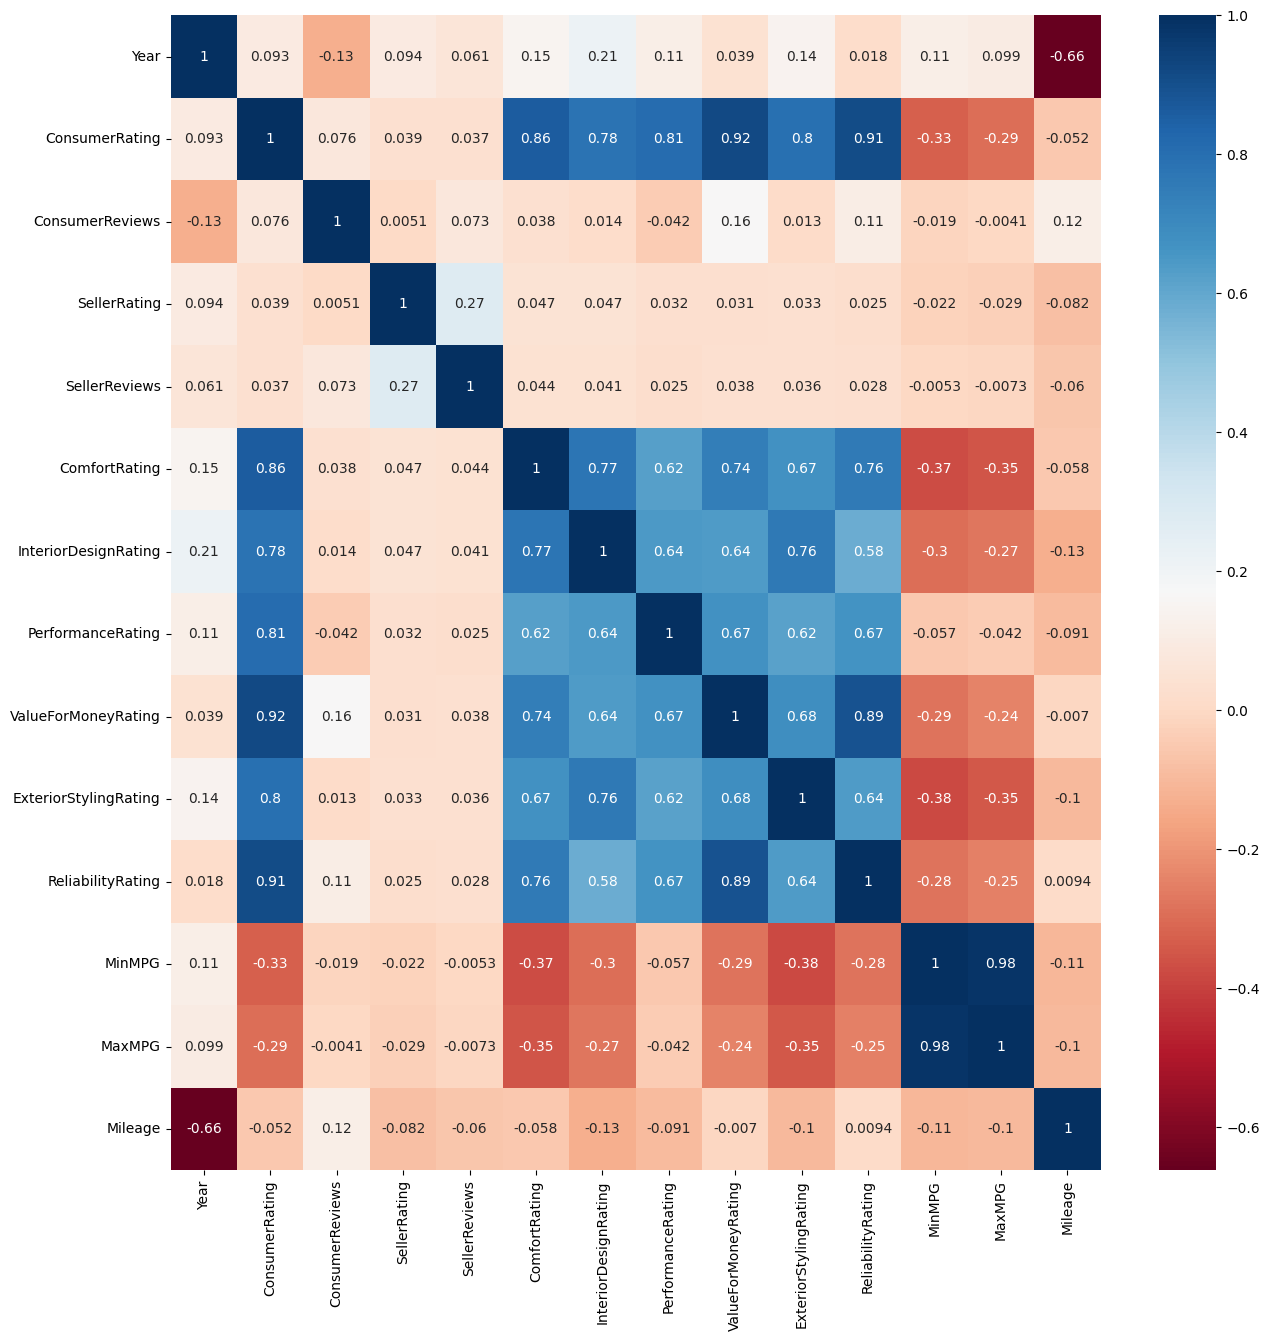

In [ ]:
plt.subplots(figsize = ([15,15]))
sns.heatmap(df.corr(),cmap = 'RdBu',annot = True)

**Heatmap shows that we can use MaxMPG,MinMG,and Age as main component to predict the price of a used car**

**According to Heatmap Mileage give the least value to consider it for comparison but mileage of a car also plays important role to predict the price. So, considering Mileage as a component**

**Cleaning the data**

In [ ]:
df["Price"] = pd.to_numeric(df["Price"].str.replace(',', '').str[1:], errors='coerce')
df.dropna(subset=['Price'], inplace=True)

**Taking input as a year for which price of the car to be checked**

In [ ]:
current_year = int(input("Enter the current year (e.g., 2023): "))

Enter the current year (e.g., 2023): 2024


**Creating a feature "Age" for age of the car**

In [ ]:
df['Age'] = current_year - df['Year']

**Considering an average depreciation of 10% to find the expected cost of the car**

In [ ]:
depreciation_rate = 0.1
# Calculate the depreciation factor based on the user-input current year
df['Depreciation'] = df['Age'] * depreciation_rate
# Apply depreciation factor to adjust prices
df['Adjusted_Price'] = df['Price'] * (1 - df['Depreciation'])

**assigning the features and target**

In [ ]:
X = df[['MinMPG','MaxMPG', 'Mileage','Age']]
y = df['Adjusted_Price']

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using RandomForestRegressor to train the model**

In [ ]:
model = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

**Evaluating the Model**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 47128694.84141981
R-squared: 0.7519226211640235


**Calculating Accuracy**

In [ ]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 75.19%


**Ploting graph to compare MaxMPG and Adjusted price**

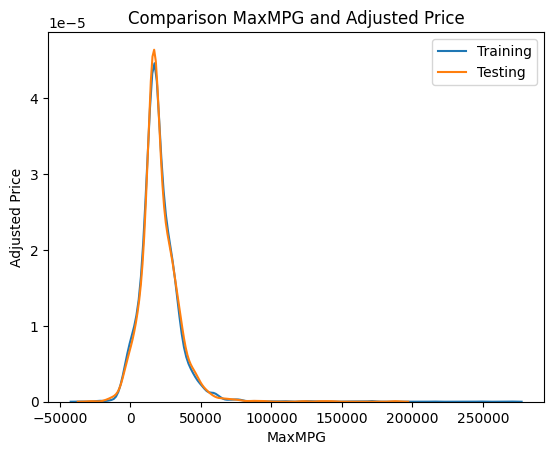

In [ ]:
sns.kdeplot(y_train, label = "Training")
sns.kdeplot(y_test, label = "Testing")
plt.title("Comparison MaxMPG and Adjusted Price")
plt.xlabel('MaxMPG')
plt.ylabel('Adjusted Price')
plt.legend()
plt.show()

**Ploting graph to compare MinMPG and Adjusted price**

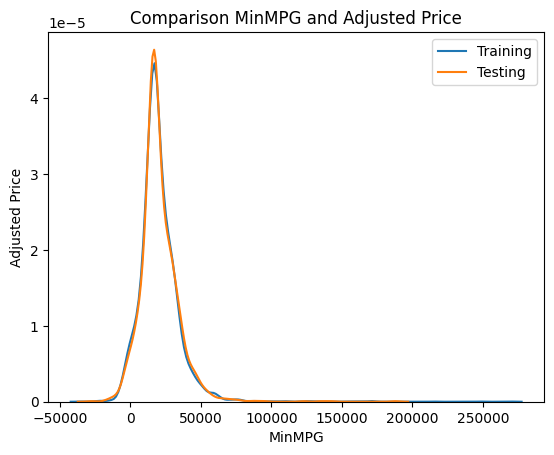

In [ ]:
sns.kdeplot(y_train, label = "Training")
sns.kdeplot(y_test, label = "Testing")
plt.title("Comparison MinMPG and Adjusted Price")
plt.xlabel('MinMPG')
plt.ylabel('Adjusted Price')
plt.legend()
plt.show()

**Ploting graph to compare Mileage and Adjusted price**

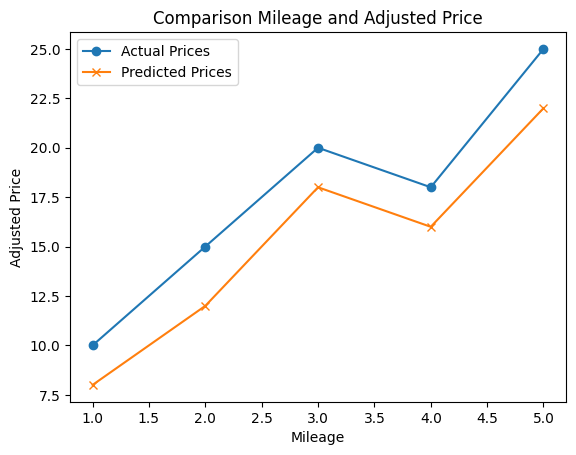

In [ ]:
time_points = [1, 2, 3, 4, 5]
values_1 = [10, 15, 20, 18, 25]
values_2 = [8, 12, 18, 16, 22]


plt.plot(time_points, values_1, label='Actual Prices', marker='o')
plt.plot(time_points, values_2, label='Predicted Prices', marker='x')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Adjusted Price')
plt.title('Comparison Mileage and Adjusted Price')
plt.show()

**Ploting graph to compare Age and Adjusted price**

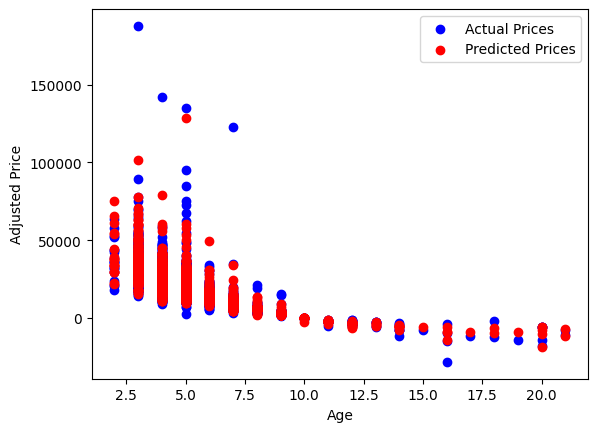

In [ ]:
plt.scatter(X_test['Age'], y_test, label='Actual Prices', color='blue')
plt.scatter(X_test['Age'], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Age')
plt.ylabel('Adjusted Price')
plt.legend()
plt.show()

**Displaying the comparison**

In [ ]:
comparison_df = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred})
comparison_df['Prediction_Difference'] = comparison_df['Predicted_Price'] - comparison_df['Actual_Price']
print(comparison_df)

      Actual_Price  Predicted_Price  Prediction_Difference
8888       13998.0     13659.612905            -338.387095
8365        9838.0     13318.606661            3480.606661
3135       18499.0     18790.600511             291.600511
6504       13598.0     13996.581075             398.581075
6069       21499.0     23740.604008            2241.604008
...            ...              ...                    ...
88         -5369.7     -3735.444269            1634.255731
8023       51098.6     53401.856059            2303.256059
4273       24433.5     20142.526228           -4290.973772
8104       11997.0     18019.475913            6022.475913
4143       18997.5     20826.047166            1828.547166

[1875 rows x 3 columns]
